In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_excel("databasef.xlsx")

<center><H1>Primera Etapa</H1></center>

<h3>Limpieza de Datos</h3>

In [3]:
#Fecha de Inicio aproximado de efecto de la vacunación y selección de positivo al COVID-19
df = df[(df['fecha_ingreso_hosp'] > '2021-05-01') & (df['cdc_positividad'] == 1)] 

#Eliminación de variables 
lst_drop = [
 'id_persona', #No se toma en cuenta porque es único
 'fecha_ingreso_hosp', #No se toma en cuenta porque es fecha
 'fecha_ingreso_uci', #No se toma en cuenta porque es fecha
 'fecha_ingreso_ucin', #No se toma en cuenta porque es fecha
 'fecha_ingreso_ucin', #No se toma en cuenta porque es fecha
 'fecha_segumiento_hosp_ultimo', #No se toma en cuenta porque es fecha
 'evolucion_hosp_ultimo', #No se toma en cuenta porque no se quiere saber la evolución
 'cdc_fecha_fallecido_covid', #No se toma en cuenta porque es fecha
 'fecha_dosis1', #No se toma en cuenta porque es fecha
 'fecha_dosis2', #No se toma en cuenta porque es fecha
 'fecha_dosis3' #No se toma en cuenta porque es fecha
 ] 
 
df_1 = df.drop(columns=lst_drop)
#Eliminacion de records con variables importantes vacias
df_1 = df_1[(df_1['edad'].notna()) & (df_1['sexo'].notna())] 
#Variable Sexo Dummy
df_1["sexo"] = np.where(df_1["sexo"] == "F", 0, 1)
#Separación de la variable Edad por Rango de Edad
df_1.loc[df_1['edad']<1, 'age_group'] = 'Neonato'
df_1.loc[df_1['edad'].between(1,7), 'age_group'] = 'Edad 1-7'
df_1.loc[df_1['edad'].between(8,15), 'age_group'] = 'Edad 8-15'
df_1.loc[df_1['edad'].between(16,30), 'age_group'] = 'Edad 16-30'
df_1.loc[df_1['edad'].between(31,45), 'age_group'] = 'Edad 31-45'
df_1.loc[df_1['edad'].between(46,60), 'age_group'] = 'Edad 46-60'
df_1.loc[df_1['edad'].between(61,90), 'age_group'] = 'Edad 61-90'
df_1.loc[df_1['edad']>90, 'age_group'] = 'Edad 90+'

In [4]:
#Conversión a enteros 
df_f = df_1.drop(columns=['edad'])
convert_dict = {'con_oxigeno': int,
                'con_ventilacion': int,
                'flag_vacuna' : int
               }
df_f = df_f.astype(convert_dict)
#Agregando otras categorías a las variables
df_f['fabricante_dosis1'] = df['fabricante_dosis1'].replace(np.nan, 'NULL')
df_f['fabricante_dosis2'] = df['fabricante_dosis2'].replace(np.nan, 'NULL')
df_f['fabricante_dosis3'] = df['fabricante_dosis3'].replace(np.nan, 'NULL')
df_f['fabricante_dosis1'] = df_f['fabricante_dosis1'].map({'NULL': 'FB 1 0 ','SINOPHARM': 'FB 1 SINOPHARM','PFIZER': 'FB 1 PFIZER','ASTRAZENECA': 'FB 1 AZTRAZENECA'})
df_f['fabricante_dosis2'] = df_f['fabricante_dosis2'].map({'NULL': 'FB 2 0 ','SINOPHARM': 'FB 2 SINOPHARM','PFIZER': 'FB 2 PFIZER','ASTRAZENECA': 'FB 2 AZTRAZENECA'})
df_f['fabricante_dosis3'] = df_f['fabricante_dosis3'].map({'NULL': 'FB 3 0 ','SINOPHARM': 'FB 3 SINOPHARM','PFIZER': 'FB 3 PFIZER','ASTRAZENECA': 'FB 3 AZTRAZENECA'})

df_f.info() #Información de la data final

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19247 entries, 0 to 138642
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   eess_renaes            19247 non-null  int64 
 1   eess_diresa            19247 non-null  object
 2   eess_red               19247 non-null  object
 3   eess_nombre            19247 non-null  object
 4   id_eess                19247 non-null  int64 
 5   sexo                   19247 non-null  int32 
 6   flag_uci               19247 non-null  int64 
 7   con_oxigeno            19247 non-null  int32 
 8   con_ventilacion        19247 non-null  int32 
 9   flag_vacuna            19247 non-null  int32 
 10  fabricante_dosis1      19247 non-null  object
 11  fabricante_dosis2      19247 non-null  object
 12  fabricante_dosis3      19247 non-null  object
 13  cdc_positividad        19247 non-null  int64 
 14  cdc_fallecido_covid    19247 non-null  int64 
 15  ubigeo_inei_domici

<h3>Creación de variables Dummy</h3>

In [5]:
final = df_f

In [6]:
cat_vars=['flag_vacuna','fabricante_dosis1','fabricante_dosis2','fabricante_dosis3','age_group']
for var in cat_vars:
    cat_list ='var'+ '_'+var
    cat_list = pd.get_dummies(final[var], prefix=var)
    data1=final.join(cat_list)
    final=data1

cat_vars=['flag_vacuna','fabricante_dosis1','fabricante_dosis2','fabricante_dosis3','age_group']
data_vars=final.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [9]:
data_final=final[to_keep]
lst = ['eess_renaes','eess_nombre','id_eess','ubigeo_inei_domicilio','prov_domicilio','dist_domicilio','cdc_positividad','eess_red','eess_diresa','dep_domicilio']
data_final = data_final.drop(columns = lst)
data_final.columns.values

array(['sexo', 'flag_uci', 'con_oxigeno', 'con_ventilacion',
       'cdc_fallecido_covid', 'flag_vacuna_0', 'flag_vacuna_1',
       'flag_vacuna_2', 'flag_vacuna_3', 'fabricante_dosis1_FB 1 0 ',
       'fabricante_dosis1_FB 1 AZTRAZENECA',
       'fabricante_dosis1_FB 1 PFIZER',
       'fabricante_dosis1_FB 1 SINOPHARM', 'fabricante_dosis2_FB 2 0 ',
       'fabricante_dosis2_FB 2 AZTRAZENECA',
       'fabricante_dosis2_FB 2 PFIZER',
       'fabricante_dosis2_FB 2 SINOPHARM', 'fabricante_dosis3_FB 3 0 ',
       'fabricante_dosis3_FB 3 AZTRAZENECA',
       'fabricante_dosis3_FB 3 PFIZER', 'age_group_Edad 1-7',
       'age_group_Edad 16-30', 'age_group_Edad 31-45',
       'age_group_Edad 46-60', 'age_group_Edad 61-90',
       'age_group_Edad 8-15', 'age_group_Edad 90+', 'age_group_Neonato'],
      dtype=object)

<center><H1>Segunda Etapa</H1></center>

<h3>Over-sampling using SMOTE</h3>

In [10]:
X = data_final.loc[:, data_final.columns != 'cdc_fallecido_covid']
y = data_final.loc[:, data_final.columns == 'cdc_fallecido_covid']
print(data_final['cdc_fallecido_covid'].value_counts())

0    14523
1     4724
Name: cdc_fallecido_covid, dtype: int64


In [11]:
#Utiliza K-neartest Neighbord
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
#Entrenamiento de datos para conseguir el Oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y= os.fit_resample(X_train, y_train)
#Creación del data frame nuevo
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['cdc_fallecido_covid'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no diseases by covid-19",len(os_data_y[os_data_y['cdc_fallecido_covid']==0]))
print("Number of diseases by covid-19",len(os_data_y[os_data_y['cdc_fallecido_covid']==1]))
print("Proportion of no diseases by covid-19 in oversampled data is ",len(os_data_y[os_data_y['cdc_fallecido_covid']==0])/len(os_data_X))
print("Proportion of diseases by covid-19 in oversampled data is ",len(os_data_y[os_data_y['cdc_fallecido_covid']==1])/len(os_data_X))

length of oversampled data is  20364
Number of no diseases by covid-19 10182
Number of diseases by covid-19 10182
Proportion of no diseases by covid-19 in oversampled data is  0.5
Proportion of diseases by covid-19 in oversampled data is  0.5


<h3>Eliminación recursiva de varibales</h3>

In [12]:
data_final_vars=data_final.columns.values.tolist()
y=['cdc_fallecido_covid']
X=[i for i in data_final_vars if i not in y]
print(X)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

['sexo', 'flag_uci', 'con_oxigeno', 'con_ventilacion', 'flag_vacuna_0', 'flag_vacuna_1', 'flag_vacuna_2', 'flag_vacuna_3', 'fabricante_dosis1_FB 1 0 ', 'fabricante_dosis1_FB 1 AZTRAZENECA', 'fabricante_dosis1_FB 1 PFIZER', 'fabricante_dosis1_FB 1 SINOPHARM', 'fabricante_dosis2_FB 2 0 ', 'fabricante_dosis2_FB 2 AZTRAZENECA', 'fabricante_dosis2_FB 2 PFIZER', 'fabricante_dosis2_FB 2 SINOPHARM', 'fabricante_dosis3_FB 3 0 ', 'fabricante_dosis3_FB 3 AZTRAZENECA', 'fabricante_dosis3_FB 3 PFIZER', 'age_group_Edad 1-7', 'age_group_Edad 16-30', 'age_group_Edad 31-45', 'age_group_Edad 46-60', 'age_group_Edad 61-90', 'age_group_Edad 8-15', 'age_group_Edad 90+', 'age_group_Neonato']


c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

[False False  True False False False False  True False  True  True  True
  True False False False  True  True False  True  True  True  True False
  True  True  True]
[13  9  1  3 11  5  6  1 10  1  1  1  1 12  7  8  1  1  2  1  1  1  1  4
  1  1  1]


In [13]:
result = np.where(rfe.ranking_ == 1)
lst = []
for i in range(0,15): lst.append(result[0][i])
lst_1 = []
for i in lst: lst_1.append(X[i])  
print(lst_1)

['con_oxigeno', 'flag_vacuna_3', 'fabricante_dosis1_FB 1 AZTRAZENECA', 'fabricante_dosis1_FB 1 PFIZER', 'fabricante_dosis1_FB 1 SINOPHARM', 'fabricante_dosis2_FB 2 0 ', 'fabricante_dosis3_FB 3 0 ', 'fabricante_dosis3_FB 3 AZTRAZENECA', 'age_group_Edad 1-7', 'age_group_Edad 16-30', 'age_group_Edad 31-45', 'age_group_Edad 46-60', 'age_group_Edad 8-15', 'age_group_Edad 90+', 'age_group_Neonato']


<h3>Eliminación de variables utilizando StatsModels (p-value)</h3>

In [14]:
X=os_data_X[lst_1]
y=os_data_y['cdc_fallecido_covid']
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.337706
         Iterations 11
                            Logit Regression Results                           
Dep. Variable:     cdc_fallecido_covid   No. Observations:                20364
Model:                           Logit   Df Residuals:                    20349
Method:                            MLE   Df Model:                           14
Date:                 Sun, 05 Jun 2022   Pseudo R-squ.:                  0.5128
Time:                         15:38:56   Log-Likelihood:                -6877.0
converged:                        True   LL-Null:                       -14115.
Covariance Type:             nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
con_oxigeno                            0.8463      

<center><H1>Tercera Etapa</H1></center>

<h3>Entrenamiento de Regresion Logistica</h3>

In [20]:
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression() #CREACION DEL MODELO
logreg.fit(X_train, y_train) #Creación del  modelo

LogisticRegression()

In [21]:
y_pred = logreg.predict(X_test) #EVALUAMOS 
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


<h3>Matriz de Confusión</h3>

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2567  454]
 [ 383 2706]]


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      3021
           1       0.86      0.88      0.87      3089

    accuracy                           0.86      6110
   macro avg       0.86      0.86      0.86      6110
weighted avg       0.86      0.86      0.86      6110



<h3>Gráfica AUC-ROC</h3>

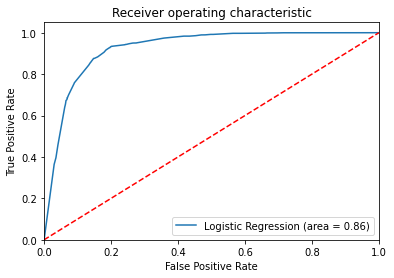

In [24]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()